In [3]:
# imports

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import xarray as xr


In [60]:
# set aesthetic parameters

line_color = '#0F0A0A'    # dark
# line_color = '#E5E4E2'    # light

neutral_color = '#E0E0E0'

# thursday
accent_colors = ['#9B5DE5', '#FFAC69', '#00C9AE', '#FD3F92', '#0F0A0A', 
                 '#959AB1', '#FFDB66', '#63B9FF','#FFB1CA', '#4F1DD7']

style = {'axes.edgecolor': line_color,
         'axes.labelcolor': line_color,
         'text.color': line_color,
         'xtick.color': line_color,
         'ytick.color': line_color,
         'font.family': 'Helvetica',
         'font.Helvetica': ['Helvetica']}

palette = sns.color_palette(accent_colors)

sns.set_context('talk', rc={'lines.linewidth': 2})
sns.set_palette(palette)
# sns.set_palette('tab20')
sns.set_style('ticks', style)

plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['savefig.dpi'] = 300


# Read in data

In [96]:
# read in sample metadata

filepath_sample_metadata = '../../data/metadata/sample_metadata.csv'
sample_df = pd.read_csv(filepath_sample_metadata)
sample_df['Cruise'] = sample_df['Cruise'].map({'kok1606': 'G1', 
                                               'mgl1704': 'G2', 
                                               'km1906': 'G3'})
sample_df['samplename'] = [name[:-2] for name in sample_df['SampleID']]
sample_df = sample_df.rename(columns={'SampleID': 'sample', 'Replicate': 'replicate'})

sample_df


,sample,Cruise,Dataset,Experiment,Station,Cast,Datetime,Latitude,Longitude,Depth,replicate,SmallFraction,LargeFraction,Unfractionated,samplename
0,G3.DEPTH.NS.S6C7.130m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:36,32.92,-158.0,130.0,B,G3.DEPTH.NS.S6C7.130m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.130m
1,G3.DEPTH.NS.S6C7.75m.A,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:40,32.92,-158.0,75.0,A,G3.DEPTH.NS.S6C7.75m.0_2um.A,NaN,True,G3.DEPTH.NS.S6C7.75m
2,G3.DEPTH.NS.S6C7.75m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:40,32.92,-158.0,75.0,B,G3.DEPTH.NS.S6C7.75m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.75m
3,G3.DEPTH.NS.S6C7.15m.A,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:44,32.92,-158.0,15.0,A,G3.DEPTH.NS.S6C7.15m.0_2um.A,NaN,True,G3.DEPTH.NS.S6C7.15m
4,G3.DEPTH.NS.S6C7.15m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:44,32.92,-158.0,15.0,B,G3.DEPTH.NS.S6C7.15m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.15m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,G2.REXP3.NS.LoNP.T96.A,G2,Resource ratio incubation,REXP3 T96 LoNP A,NaN,NaN,6/12/17,NaN,NaN,NaN,A,G2.REXP3.NS.LoNP.T96.0_2um.A,G2.REXP3.NS.LoNP.T96.3um.A,False,G2.REXP3.NS.LoNP.T96
218,G2.REXP3.NS.LoNP.T96.C,G2,Resource ratio incubation,REXP3 T96 LoNP C,NaN,NaN,6/12/17,NaN,NaN,NaN,C,G2.REXP3.NS.LoNP.T96.0_2um.C,G2.REXP3.NS.LoNP.T96.3um.C,False,G2.REXP3.NS.LoNP.T96
219,G2.REXP3.NS.NPFe.T96.A,G2,Resource ratio incubation,REXP3 T96 NPFe A,NaN,NaN,6/12/17,NaN,NaN,NaN,A,G2.REXP3.NS.NPFe.T96.0_2um.A,G2.REXP3.NS.NPFe.T96.3um.A,False,G2.REXP3.NS.NPFe.T96
220,G2.REXP3.NS.NPFe.T96.B,G2,Resource ratio incubation,REXP3 T96 NPFe B,NaN,NaN,6/12/17,NaN,NaN,NaN,B,G2.REXP3.NS.NPFe.T96.0_2um.B,G2.REXP3.NS.NPFe.T96.3um.B,False,G2.REXP3.NS.NPFe.T96


In [98]:
# read in normalized data

syn_standard_ds = xr.open_dataset('../../data/3-normalization/syn-res-abun.nc')
pro_standard_ds = xr.open_dataset('../../data/3-normalization/pro-res-abun.nc')

syn_standard_ds


<xarray.Dataset>
Dimensions:     (ortholog: 6578, clade: 6, sample: 222)
Coordinates:
  * ortholog    (ortholog) int64 60000001 60000002 ... 60040245 60040289
  * clade       (clade) object '5.1A-I' '5.1A-II' ... '5.1B-VII' 'CDR2'
  * sample      (sample) object 'G1.SURF.NS.S02C1.15m.A' ... 'G3.UW.NS.UW40_2...
Data variables:
    residual    (ortholog, clade, sample) float64 ...
    replicate   (sample) object ...
    samplename  (sample) object ...
    annotation  (ortholog) object ...

# Look at dimensionality reduction analysis

In [103]:
# make dataframes from data tensors

# unfold syn residuals into dataframe
syn_embed_df = syn_standard_ds.residual.to_dataframe().reset_index().pivot(
#     index=['sample', 'clade'], 
#     columns='ortholog'
    index='sample', 
    columns=['ortholog', 'clade']
)

# unfold pro residuals into dataframe
pro_embed_df = pro_standard_ds.residual.to_dataframe().reset_index().pivot(
#     index=['sample', 'clade'], 
#     columns='ortholog'
    index='sample', 
    columns=['ortholog', 'clade']
)

syn_embed_df


residual                                          \
ortholog                60000001                                           
clade                     5.1A-I   5.1A-II  5.1A-III   5.1A-IV  5.1B-VII   
sample                                                                     
G1.SURF.NS.S02C1.15m.A  0.000000  0.630717  0.657412  0.000000 -1.063784   
G1.SURF.NS.S02C1.15m.B  0.000000  1.875620  0.280271  0.000000  0.000000   
G1.SURF.NS.S02C1.15m.C  0.000000  1.459562  0.579669  0.000000  0.000000   
G1.SURF.NS.S04C1.15m.A -0.982086  1.187271  0.840782 -0.581591 -0.617931   
G1.SURF.NS.S04C1.15m.B -0.189006  1.160001  0.851302  0.957504 -0.484109   
...                          ...       ...       ...       ...       ...   
G3.UW.NS.UW40_1.7m.B    0.258553  0.000000  0.000000  0.179795 -0.365397   
G3.UW.NS.UW40_1.7m.C    0.797191  0.000000  0.000000  0.329692 -0.354990   
G3.UW.NS.UW40_2.7m.A    1.474416  0.000000  0.000000  0.484156  2.478234   
G3.UW.NS.UW40_2.7m.B    0.517246  0.000000  0.000000  0.894817  2.005661   
G3.UW.NS.UW40_2.7m.C    0.722062  0.000000  0.000000  0.718120  0.870955   

                                                                          ...  \
ortholog                          60000002                                ...   
clade                       CDR2    5.1A-I   5.1A-II  5.1A-III   5.1A-IV  ...   
sample                                                                    ...   
G1.SURF.NS.S02C1.15m.A -0.878942  0.000000  0.628099  0.794412  0.000000  ...   
G1.SURF.NS.S02C1.15m.B -0.966359  0.000000  1.138621  1.098097  0.000000  ...   
G1.SURF.NS.S02C1.15m.C -0.904617  0.000000  0.754095  0.700769  0.000000  ...   
G1.SURF.NS.S04C1.15m.A  0.992952 -1.060040  0.047115  1.308759 -1.135689  ...   
G1.SURF.NS.S04C1.15m.B  0.774919 -1.173274  0.059784  0.481255 -0.940177  ...   
...                          ...       ...       ...       ...       ...  ...   
G3.UW.NS.UW40_1.7m.B    0.023372  0.304161  0.000000  0.000000 -0.080410  ...   
G3.UW.NS.UW40_1.7m.C   -0.864773  1.059074  0.000000  0.000000  0.542273  ...   
G3.UW.NS.UW40_2.7m.A   -0.121422 -0.382482  0.000000  0.000000  0.300369  ...   
G3.UW.NS.UW40_2.7m.B    1.394480  0.471117  0.000000  0.000000  0.563583  ...   
G3.UW.NS.UW40_2.7m.C   -0.889733  0.132619  0.000000  0.000000  0.273607  ...   

                                                                             \
ortholog               60040245                            60040289           
clade                  5.1A-III 5.1A-IV 5.1B-VII      CDR2   5.1A-I 5.1A-II   
sample                                                                        
G1.SURF.NS.S02C1.15m.A      0.0     0.0      0.0 -0.002873      0.0     0.0   
G1.SURF.NS.S02C1.15m.B      0.0     0.0      0.0 -0.003859      0.0     0.0   
G1.SURF.NS.S02C1.15m.C      0.0     0.0      0.0 -0.003133      0.0     0.0   
G1.SURF.NS.S04C1.15m.A      0.0     0.0      0.0 -0.260630      0.0     0.0   
G1.SURF.NS.S04C1.15m.B      0.0     0.0      0.0 -0.388370      0.0     0.0   
...                         ...     ...      ...       ...      ...     ...   
G3.UW.NS.UW40_1.7m.B        0.0     0.0      0.0 -0.002446      0.0     0.0   
G3.UW.NS.UW40_1.7m.C        0.0     0.0      0.0 -0.002740      0.0     0.0   
G3.UW.NS.UW40_2.7m.A        0.0     0.0      0.0 -0.002916      0.0     0.0   
G3.UW.NS.UW40_2.7m.B        0.0     0.0      0.0 -0.001523      0.0     0.0   
G3.UW.NS.UW40_2.7m.C        0.0     0.0      0.0 -0.002980      0.0     0.0   

                                                        
ortholog                                                
clade                  5.1A-III 5.1A-IV  5.1B-VII CDR2  
sample                                                  
G1.SURF.NS.S02C1.15m.A      0.0     0.0 -0.000137  0.0  
G1.SURF.NS.S02C1.15m.B      0.0     0.0  0.000000  0.0  
G1.SURF.NS.S02C1.15m.C      0.0     0.0  0.000000  0.0  
G1.SURF.NS.S04C1.15m.A      0.0     0.0 -0.002994  0.0  
G1.SURF.NS.S04C1.15m.B   

In [104]:
# UMAP of PCA

# parameters
n_comp_pca = 20
n_comp_umap = 2
input_df = pro_embed_df

# run PCA
print('Running PCA with {} components...'.format(n_comp_pca))
pca_model = PCA(n_components=n_comp_pca)
embedding = pca.fit_transform(input_df)

# run UMAP
print('Running UMAP with {} components...'.format(n_comp_umap))
umap_model = umap.UMAP(n_components=n_comp_umap)
# embedding = umap_model.fit_transform(input_df)
embedding = umap_model.fit_transform(embedding)

# merge on metadata
embedding_df = pd.DataFrame(embedding, index=input_df.index)
merged_df = pd.merge(embedding_df.reset_index(), sample_df, on='sample', how='left')

# merged_df


Running PCA with 20 components...
Running UMAP with 2 components...


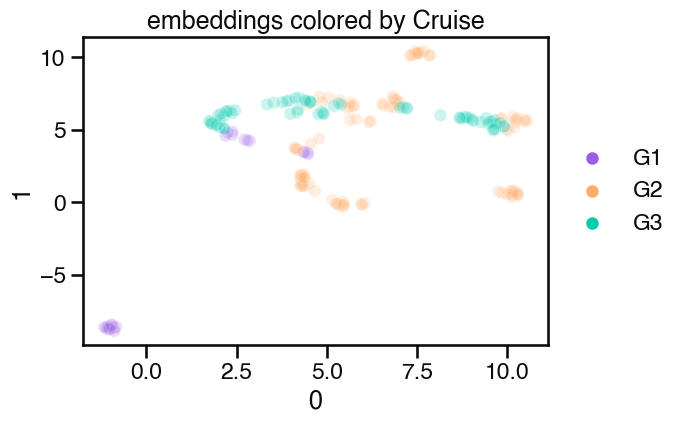

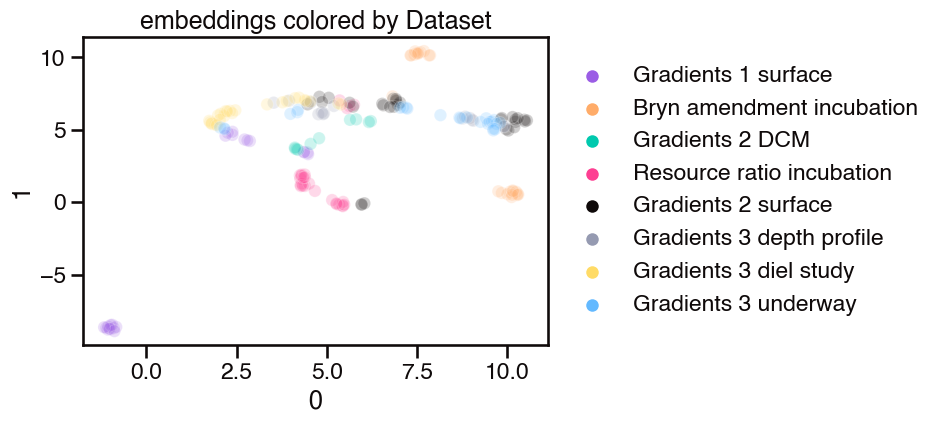

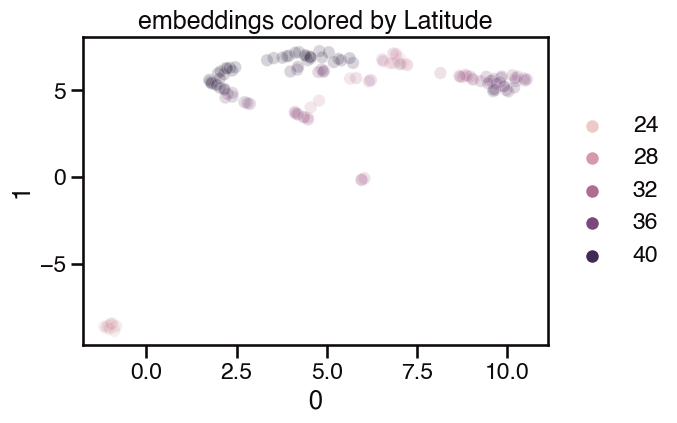

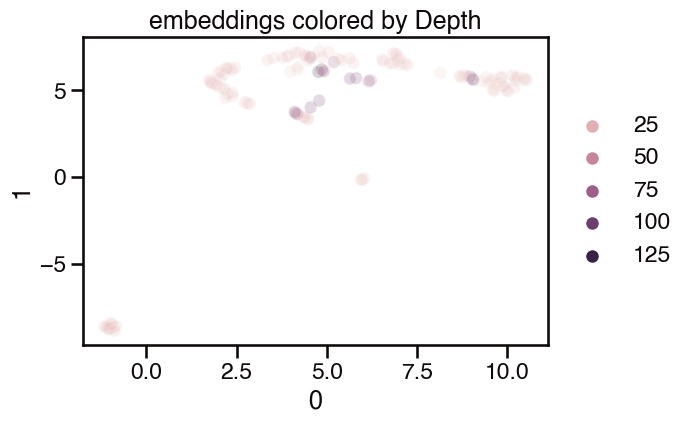

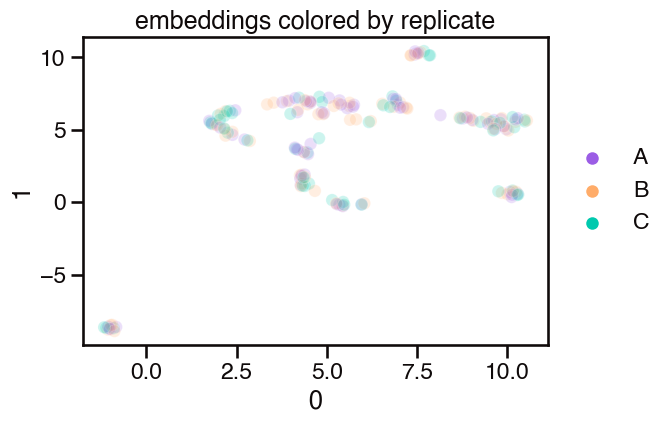

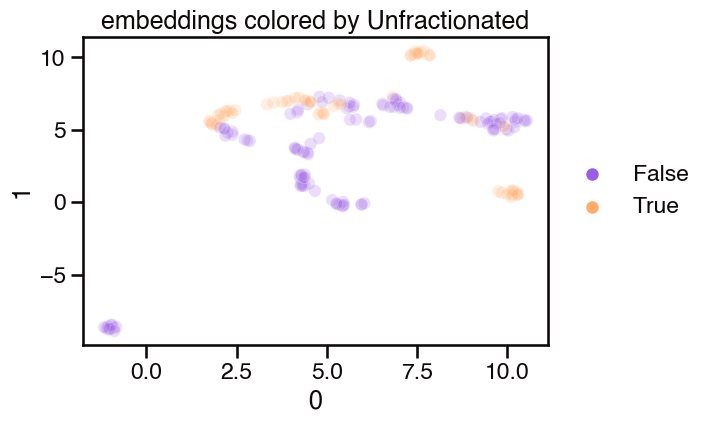

In [105]:
# plot dimensionality-reduced data

# variables = ['clade', 'Cruise', 'Dataset', 'Latitude', 'Depth', 'replicate', 'Unfractionated']
variables = ['Cruise', 'Dataset', 'Latitude', 'Depth', 'replicate', 'Unfractionated']

# plot each variable
for var in variables:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.scatterplot(x=0, y=1, hue=var, alpha=0.2, data=merged_df, ax=ax)
    plt.title('embeddings colored by {}'.format(var))
    plt.legend(loc='center left', bbox_to_anchor=[1, 0.5]);
#     plt.tight_layout()
    plt.show()
#     fig.savefig('../figures/PCA_vs_{}.png'.format(var))
